In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/bs.csv")
df.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [4]:
cols = ['age', 'gender', 'category']
lb_make = LabelEncoder()
for col in cols:
    df[col + "_code"] = lb_make.fit_transform(df[col])
df.head()    

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,age_code,gender_code,category_code
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0,4,2,12
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0,2,2,12
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0,4,1,12
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0,3,2,12
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0,5,2,12


In [14]:
df["category_code"].groupby(df["category"]).unique()

category
'es_barsandrestaurants'     [0]
'es_contents'               [1]
'es_fashion'                [2]
'es_food'                   [3]
'es_health'                 [4]
'es_home'                   [5]
'es_hotelservices'          [6]
'es_hyper'                  [7]
'es_leisure'                [8]
'es_otherservices'          [9]
'es_sportsandtoys'         [10]
'es_tech'                  [11]
'es_transportation'        [12]
'es_travel'                [13]
'es_wellnessandbeauty'     [14]
Name: category_code, dtype: object

In [15]:
df["gender_code"].groupby(df["gender"]).unique()

gender
'E'    [0]
'F'    [1]
'M'    [2]
'U'    [3]
Name: gender_code, dtype: object

In [16]:
df["age_code"].groupby(df["age"]).unique()

age
'0'    [0]
'1'    [1]
'2'    [2]
'3'    [3]
'4'    [4]
'5'    [5]
'6'    [6]
'U'    [7]
Name: age_code, dtype: object

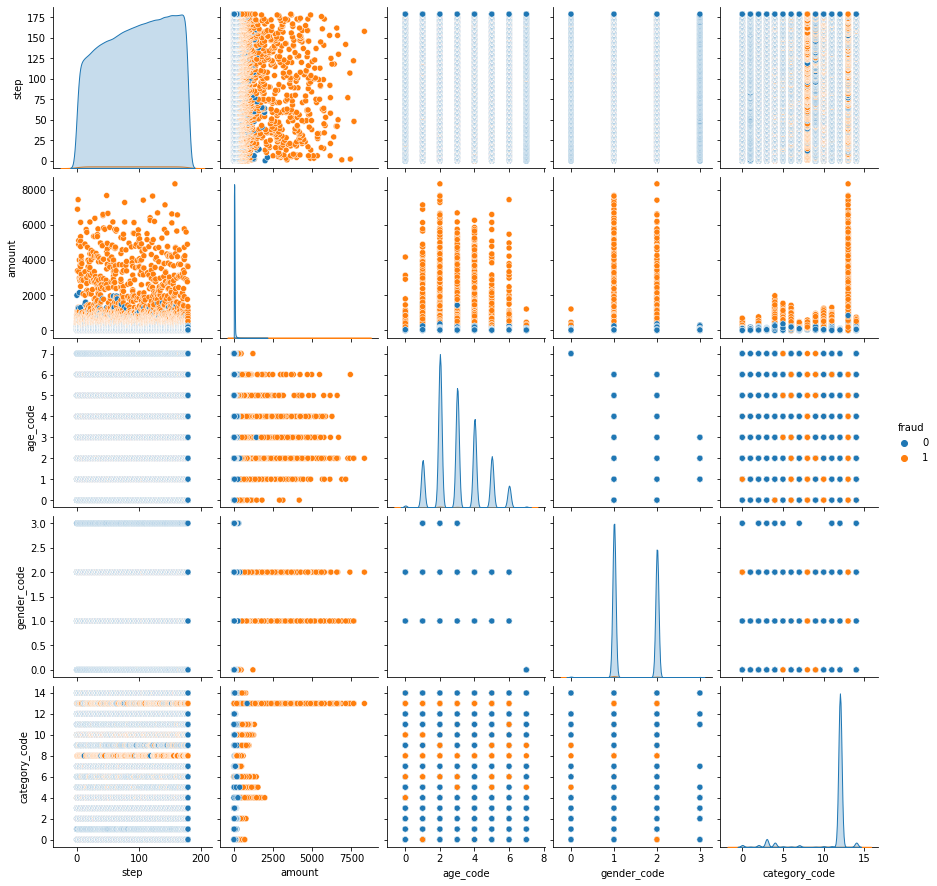

In [18]:
import seaborn as sns
sns.pairplot(df,hue="fraud")

In [19]:
# correlation heatmap 
df.corr().style.background_gradient(cmap='coolwarm')

,step,amount,fraud,age_code,gender_code,category_code
step,1.000000,-0.007961,-0.011898,0.001169,-0.001107,-0.017269
amount,-0.007961,1.000000,0.489967,-0.003930,-0.012888,-0.098738
fraud,-0.011898,0.489967,1.000000,-0.004315,-0.025047,-0.114272
age_code,0.001169,-0.003930,-0.004315,1.000000,0.005020,0.004816
gender_code,-0.001107,-0.012888,-0.025047,0.005020,1.000000,0.007700
category_code,-0.017269,-0.098738,-0.114272,0.004816,0.007700,1.000000


In [20]:
# covariance 
df.cov()

,step,amount,fraud,age_code,gender_code,category_code
step,2606.473313,-45.280726,-0.066435,0.079745,-0.028445,-2.483664
amount,-45.280726,12410.590739,5.969747,-0.584794,-0.722589,-30.987523
fraud,-0.066435,5.969747,0.011962,-0.000630,-0.001379,-0.035208
age_code,0.079745,-0.584794,-0.000630,1.784586,0.003375,0.018124
gender_code,-0.028445,-0.722589,-0.001379,0.003375,0.253302,0.010917
category_code,-2.483664,-30.987523,-0.035208,0.018124,0.010917,7.936151


In [21]:
#Pearson chi square test age and fraud
#finding the association between age and fraud

from scipy.stats import chi2_contingency
from scipy.stats import chi2

columns = ['age', 'gender', 'category']
stats = []

for col in columns:
    result = {}
    myCrosstable = pd.crosstab(df[col], df['fraud'])
    chiVal, pVal, dof, exp = chi2_contingency(myCrosstable)


#interpret test-statistic

#Test Statistic >= Critical Value: reject null hypothesis, dependent (Ha)
#Test Statistic < Critical Value: fail to reject null hypothesis, independent (Ho)
#chi.ppf(q, df, loc=0, scale=1) inverset CDF

    prob = 0.95 #significant value = 1 - 0.95 = 0.05
    critical = chi2.ppf(prob, dof)
    result['column'] = col
    result['critical'] = round(critical, 2)
    result['chiVal'] = round(chiVal, 2)
    if chiVal >= critical:
        result['H0'] = 'reject/dependent'
    else:
        result['H0'] = 'accepted/independent'

    
# interpret 
# p-value <= alpha: reject null hypothesis, dependent (Ha)
# p-value > alpha: fail to reject null hypothesis, independedt (Ho)

    alpha = 0.05
    result['significance'] = round(alpha, 2)
    result['p'] = round(pVal, 2)
    if pVal <= alpha:
        result['dependent'] = 'Dependent (reject H0)'
    else:
        result['independent'] = 'Independent (fail to reject H0)'
    stats.append(result)

[{'column': 'age', 'critical': 14.07, 'chiVal': 44.15, 'H0': 'reject/dependent', 'significance': 0.05, 'p': 0.0, 'dependent': 'Dependent (reject H0)'}, {'column': 'gender', 'critical': 7.81, 'chiVal': 393.43, 'H0': 'reject/dependent', 'significance': 0.05, 'p': 0.0, 'dependent': 'Dependent (reject H0)'}, {'column': 'category', 'critical': 23.68, 'chiVal': 193862.64, 'H0': 'reject/dependent', 'significance': 0.05, 'p': 0.0, 'dependent': 'Dependent (reject H0)'}]


In [22]:
stats

[{'column': 'age',
  'critical': 14.07,
  'chiVal': 44.15,
  'H0': 'reject/dependent',
  'significance': 0.05,
  'p': 0.0,
  'dependent': 'Dependent (reject H0)'},
 {'column': 'gender',
  'critical': 7.81,
  'chiVal': 393.43,
  'H0': 'reject/dependent',
  'significance': 0.05,
  'p': 0.0,
  'dependent': 'Dependent (reject H0)'},
 {'column': 'category',
  'critical': 23.68,
  'chiVal': 193862.64,
  'H0': 'reject/dependent',
  'significance': 0.05,
  'p': 0.0,
  'dependent': 'Dependent (reject H0)'}]